[https://www.star.bnl.gov/protected/common/common2012/trigger2012/lumipp200GeV/](https://www.star.bnl.gov/protected/common/common2012/trigger2012/lumipp200GeV/)

Files starting from `lum_` has the format of 

`13040003 3456966 3457845 16386 0.00648690397942378 1.0 0.938175343811395 BBCMB 0.938886112831796 0.00180317170501673 0.000468243000416957`

- Run number
- Start time in seconds since midnight Dec 31, 2013
- End time
- Bunch Fill number
- Sampled Luminosity
- Prescale
- Lifetime
- base trigger for luminosity
- lifetime of base trigger
- FOM - Figure of Merit for polarization of yellow and blue beams
- FOM4 - Figure of Merit 4 for polarization of yellow and blue beams

Files starting from `nev_` has the format of `6182002	62410630.000`

- Start time in seconds since midnight Dec 31, 2013 
- Cumulative Number of events


In [19]:
import os
data_path = './'
data_files = [
 'VPDMB-30_9.txt',
 'BHT2VPDMB-30_9.txt',
 'VPDMB-30_2.txt',  
 'BHT2VPDMB-30_2.txt'
]

# read bad runs from file BadRunsList_14.txt
# each run in separate line
bad_run_list = []
with open('BadRunList_14.list') as f:
    bad_run_list = f.readlines()
    bad_run_list = [x.strip() for x in bad_run_list]
bad_run_list



['15076108',
 '15077001',
 '15077003',
 '15077033',
 '15077042',
 '15077043',
 '15077044',
 '15077045',
 '15077046',
 '15077048',
 '15077049',
 '15077050',
 '15077051',
 '15077059',
 '15077061',
 '15077063',
 '15077067',
 '15079048',
 '15078001',
 '15078069',
 '15078071',
 '15078073',
 '15078074',
 '15078075',
 '15078103',
 '15078104',
 '15078107',
 '15078108',
 '15079041',
 '15080053',
 '15080054',
 '15080059',
 '15081015',
 '15081022',
 '15082016',
 '15082023',
 '15082030',
 '15082031',
 '15082052',
 '15082064',
 '15083019',
 '15083021',
 '15083023',
 '15083025',
 '15083027',
 '15083028',
 '15084002',
 '15084006',
 '15084009',
 '15084010',
 '15084011',
 '15084022',
 '15084025',
 '15084027',
 '15084028',
 '15084029',
 '15084030',
 '15084036',
 '15084064',
 '15086060',
 '15086076',
 '15087013',
 '15087042',
 '15087055',
 '15088003',
 '15088004',
 '15088005',
 '15088006',
 '15089009',
 '15089010',
 '15090068',
 '15092016',
 '15092017',
 '15092018',
 '15089023',
 '15089024',
 '15089025',

In [20]:
import pandas as pd
import numpy as np

lumi_columns=['run', 'start_time',  'end_time', 'bunch_fill', 'sampled_lumi', 'prescale', 'livetime', 'base_trigger', 'lifetime_base_trigger']
# Load VPDMB data
lumi_VPDMB = pd.read_csv(data_path + data_files[0], sep=' ', header=None, names=lumi_columns)
lumi_VPDMB

,run,start_time,end_time,bunch_fill,sampled_lumi,prescale,livetime,base_trigger,lifetime_base_trigger
0,15076101,6648831,6649023,18064,0.001309,37.726803,0.892751,VPD-ZDC-novtx-mon,0.892414
1,15076102,6649076,6649721,18064,0.004583,36.995602,0.924733,VPD-ZDC-novtx-mon,0.924599
2,15076105,6650173,6651296,18064,0.007093,33.684803,0.840959,VPD-ZDC-novtx-mon,0.840750
3,15076108,6651621,6651843,18064,0.001525,29.932800,0.908784,VPD-ZDC-novtx-mon,0.907903
4,15076109,6651918,6653503,18064,0.011155,29.294802,0.939789,VPD-ZDC-novtx-mon,0.939594
...,...,...,...,...,...,...,...,...,...
2995,15167009,14441358,14443165,18427,0.000211,9574.750000,0.859957,VPD-ZDC-novtx-mon,0.860404
2996,15167011,14443297,14445128,18427,0.000214,9847.500000,0.859347,VPD-ZDC-novtx-mon,0.859311
2997,15167012,14445177,14447100,18427,0.000244,8932.250000,0.849192,VPD-ZDC-novtx-mon,0.849636
2998,15167013,14447165,14448862,18427,0.000212,9710.000000,0.846826,VPD-ZDC-novtx-mon,0.846727


In [21]:
# load number of events per day
events_columns = ['start_time', 'cumulated_nevents']
nev_perday_VPDMB = pd.read_csv(data_path + data_files[2], sep='\t', header=None, names=events_columns)
nev_perday_VPDMB

,start_time,cumulated_nevents
0,6648831,7857.0
1,6649076,35358.0
2,6650173,77918.0
3,6651621,87068.0
4,6651918,153999.0
...,...,...
2995,14441358,42057448.0
2996,14443297,42058731.0
2997,14445177,42060193.0
2998,14447165,42061466.0


In [22]:
#calculate number of events per start_time
nev_perday_VPDMB['nevents'] = nev_perday_VPDMB.cumulated_nevents.diff()
# first row nevents is equal to cumulated_nevents
nev_perday_VPDMB.loc[0, 'nevents'] = nev_perday_VPDMB.loc[0, 'cumulated_nevents']
nev_perday_VPDMB

,start_time,cumulated_nevents,nevents
0,6648831,7857.0,7857.0
1,6649076,35358.0,27501.0
2,6650173,77918.0,42560.0
3,6651621,87068.0,9150.0
4,6651918,153999.0,66931.0
...,...,...,...
2995,14441358,42057448.0,1267.0
2996,14443297,42058731.0,1283.0
2997,14445177,42060193.0,1462.0
2998,14447165,42061466.0,1273.0


In [23]:
# merge the two dataframes by start_time
lumi_VPDMB = pd.merge(lumi_VPDMB, nev_perday_VPDMB, on='start_time')
lumi_VPDMB

,run,start_time,end_time,bunch_fill,sampled_lumi,prescale,livetime,base_trigger,lifetime_base_trigger,cumulated_nevents,nevents
0,15076101,6648831,6649023,18064,0.001309,37.726803,0.892751,VPD-ZDC-novtx-mon,0.892414,7857.0,7857.0
1,15076102,6649076,6649721,18064,0.004583,36.995602,0.924733,VPD-ZDC-novtx-mon,0.924599,35358.0,27501.0
2,15076105,6650173,6651296,18064,0.007093,33.684803,0.840959,VPD-ZDC-novtx-mon,0.840750,77918.0,42560.0
3,15076108,6651621,6651843,18064,0.001525,29.932800,0.908784,VPD-ZDC-novtx-mon,0.907903,87068.0,9150.0
4,15076109,6651918,6653503,18064,0.011155,29.294802,0.939789,VPD-ZDC-novtx-mon,0.939594,153999.0,66931.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,15167009,14441358,14443165,18427,0.000211,9574.750000,0.859957,VPD-ZDC-novtx-mon,0.860404,42057448.0,1267.0
2996,15167011,14443297,14445128,18427,0.000214,9847.500000,0.859347,VPD-ZDC-novtx-mon,0.859311,42058731.0,1283.0
2997,15167012,14445177,14447100,18427,0.000244,8932.250000,0.849192,VPD-ZDC-novtx-mon,0.849636,42060193.0,1462.0
2998,15167013,14447165,14448862,18427,0.000212,9710.000000,0.846826,VPD-ZDC-novtx-mon,0.846727,42061466.0,1273.0


In [24]:
# drop base_trigger,start_time, end_time, bunch_fill,base_trigger, lifetime_base_trigger, cumulated_nevents, FOM,FOM4
lumi_VPDMB = lumi_VPDMB.drop(columns=['start_time', 'end_time', 'bunch_fill', 'base_trigger', 'lifetime_base_trigger', 'cumulated_nevents'])
lumi_VPDMB

,run,sampled_lumi,prescale,livetime,nevents
0,15076101,0.001309,37.726803,0.892751,7857.0
1,15076102,0.004583,36.995602,0.924733,27501.0
2,15076105,0.007093,33.684803,0.840959,42560.0
3,15076108,0.001525,29.932800,0.908784,9150.0
4,15076109,0.011155,29.294802,0.939789,66931.0
...,...,...,...,...,...
2995,15167009,0.000211,9574.750000,0.859957,1267.0
2996,15167011,0.000214,9847.500000,0.859347,1283.0
2997,15167012,0.000244,8932.250000,0.849192,1462.0
2998,15167013,0.000212,9710.000000,0.846826,1273.0


In [25]:
# drop bad runs
lumi_VPDMB = lumi_VPDMB[~lumi_VPDMB.run.isin(bad_run_list)]
lumi_VPDMB

,run,sampled_lumi,prescale,livetime,nevents
0,15076101,0.001309,37.726803,0.892751,7857.0
1,15076102,0.004583,36.995602,0.924733,27501.0
2,15076105,0.007093,33.684803,0.840959,42560.0
3,15076108,0.001525,29.932800,0.908784,9150.0
4,15076109,0.011155,29.294802,0.939789,66931.0
...,...,...,...,...,...
2995,15167009,0.000211,9574.750000,0.859957,1267.0
2996,15167011,0.000214,9847.500000,0.859347,1283.0
2997,15167012,0.000244,8932.250000,0.849192,1462.0
2998,15167013,0.000212,9710.000000,0.846826,1273.0


In [26]:
# do the same for BHT2
lumi_BHT2 = pd.read_csv(data_path + data_files[1], sep=' ', header=None, names=lumi_columns)
nev_perday_BHT2 = pd.read_csv(data_path + data_files[3], sep='\t', header=None, names=events_columns)
nev_perday_BHT2['nevents'] = nev_perday_BHT2.cumulated_nevents.diff()
lumi_BHT2 = pd.merge(lumi_BHT2, nev_perday_BHT2, on='start_time')
lumi_BHT2 = lumi_BHT2.drop(columns=['start_time', 'end_time', 'bunch_fill', 'base_trigger', 'lifetime_base_trigger', 'cumulated_nevents'])
lumi_BHT2 = lumi_BHT2[~lumi_BHT2.run.isin(bad_run_list)]
lumi_BHT2

,run,sampled_lumi,prescale,livetime,nevents
0,15076101,0.047381,1.0,0.856209,NaN
1,15076102,0.160129,1.0,0.873250,4864.0
2,15076105,0.225925,1.0,0.795161,7280.0
3,15076108,0.043671,1.0,0.869425,1345.0
4,15076109,0.312479,1.0,0.898638,9697.0
...,...,...,...,...,...
2930,15167009,1.924520,1.0,0.818552,56449.0
2931,15167011,1.992259,1.0,0.813042,58739.0
2932,15167012,2.067648,1.0,0.806725,61658.0
2933,15167013,1.943445,1.0,0.798859,57422.0


In [27]:
#Make a unified dataframe with VPDMB+BHT2 on the same run
lumi_VPDMB_BHT2 = pd.merge(lumi_VPDMB, lumi_BHT2, on='run', suffixes=('_MB', '_HT2'))
lumi_VPDMB_BHT2


,run,sampled_lumi_MB,prescale_MB,livetime_MB,nevents_MB,sampled_lumi_HT2,prescale_HT2,livetime_HT2,nevents_HT2
0,15076101,0.001309,37.726803,0.892751,7857.0,0.047381,1.0,0.856209,NaN
1,15076102,0.004583,36.995602,0.924733,27501.0,0.160129,1.0,0.873250,4864.0
2,15076105,0.007093,33.684803,0.840959,42560.0,0.225925,1.0,0.795161,7280.0
3,15076108,0.001525,29.932800,0.908784,9150.0,0.043671,1.0,0.869425,1345.0
4,15076109,0.011155,29.294802,0.939789,66931.0,0.312479,1.0,0.898638,9697.0
...,...,...,...,...,...,...,...,...,...
2925,15167009,0.000211,9574.750000,0.859957,1267.0,1.924520,1.0,0.818552,56449.0
2926,15167011,0.000214,9847.500000,0.859347,1283.0,1.992259,1.0,0.813042,58739.0
2927,15167012,0.000244,8932.250000,0.849192,1462.0,2.067648,1.0,0.806725,61658.0
2928,15167013,0.000212,9710.000000,0.846826,1273.0,1.943445,1.0,0.798859,57422.0


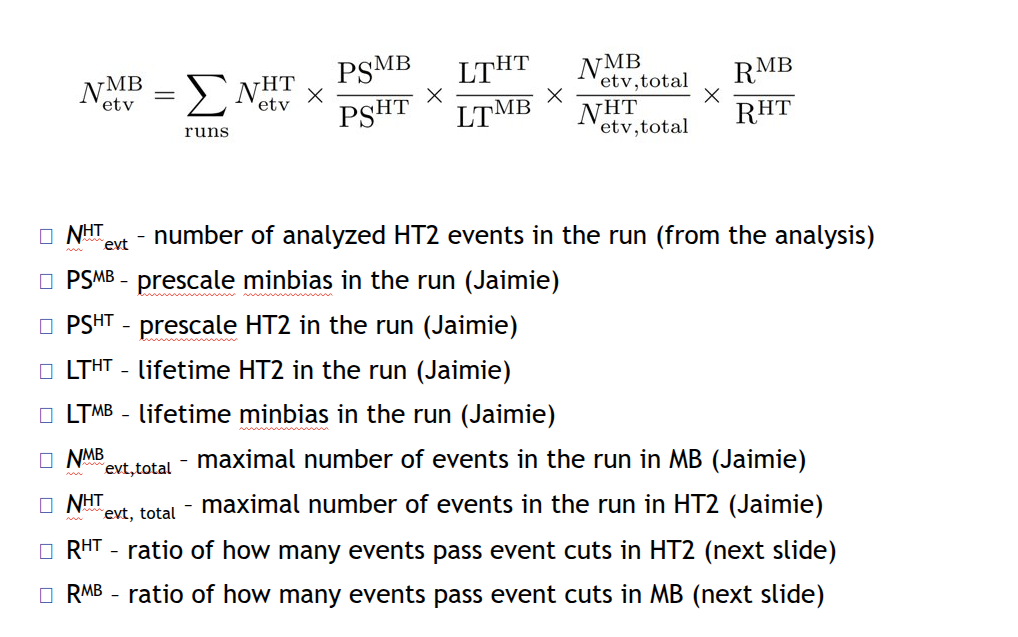

# Calculate correction factor for each run for HT2 trigger

In [28]:
# BHT2_weight =(prescale_VPDMB/prescale_BHT2)*(lifetime_BHT2/lifetime_VPDMB)*(nevents_VPDMB/nevents_BHT2)
# save to csv
lumi_VPDMB_BHT2.to_csv('lumi_VPDMB_HT2.csv', index=False)
lumi_VPDMB_BHT2

,run,sampled_lumi_MB,prescale_MB,livetime_MB,nevents_MB,sampled_lumi_HT2,prescale_HT2,livetime_HT2,nevents_HT2
0,15076101,0.001309,37.726803,0.892751,7857.0,0.047381,1.0,0.856209,NaN
1,15076102,0.004583,36.995602,0.924733,27501.0,0.160129,1.0,0.873250,4864.0
2,15076105,0.007093,33.684803,0.840959,42560.0,0.225925,1.0,0.795161,7280.0
3,15076108,0.001525,29.932800,0.908784,9150.0,0.043671,1.0,0.869425,1345.0
4,15076109,0.011155,29.294802,0.939789,66931.0,0.312479,1.0,0.898638,9697.0
...,...,...,...,...,...,...,...,...,...
2925,15167009,0.000211,9574.750000,0.859957,1267.0,1.924520,1.0,0.818552,56449.0
2926,15167011,0.000214,9847.500000,0.859347,1283.0,1.992259,1.0,0.813042,58739.0
2927,15167012,0.000244,8932.250000,0.849192,1462.0,2.067648,1.0,0.806725,61658.0
2928,15167013,0.000212,9710.000000,0.846826,1273.0,1.943445,1.0,0.798859,57422.0


In [29]:
import pandas as pd
lumi =  pd.read_csv("lumi_VPDMB_HT2.csv",index_col="run")

lumi['prescale_MB_over_HT2'] = lumi['prescale_MB'] / lumi['prescale_HT2']
lumi['livetime_HT2_over_MB'] = lumi['livetime_HT2'] / lumi['livetime_MB']
lumi['nevents_MB_over_HT2'] = lumi['nevents_MB'] / lumi['nevents_HT2']

lumi['weight'] = lumi['prescale_MB_over_HT2'] * lumi['livetime_HT2_over_MB'] * lumi['nevents_MB_over_HT2']

In [30]:
# lumi.dropna(inplace=True)


# #  drop nevents_MB_over_HT2 which are lower than 1e-4 or higher than 1000
# lumi = lumi[(lumi.nevents_MB_over_HT2 > 1e-4) & (lumi.nevents_MB_over_HT2 < 1000)]
# # drop prescale_MB_over_HT2 whichs higher than 100000
# lumi = lumi[lumi.prescale_MB_over_HT2 < 100000]
lumi

,sampled_lumi_MB,prescale_MB,livetime_MB,nevents_MB,sampled_lumi_HT2,prescale_HT2,livetime_HT2,nevents_HT2,prescale_MB_over_HT2,livetime_HT2_over_MB,nevents_MB_over_HT2,weight
run,,,,,,,,,,,,
15076101,0.001309,37.726803,0.892751,7857.0,0.047381,1.0,0.856209,NaN,37.726803,0.959068,NaN,NaN
15076102,0.004583,36.995602,0.924733,27501.0,0.160129,1.0,0.873250,4864.0,36.995602,0.944326,5.653988,197.527237
15076105,0.007093,33.684803,0.840959,42560.0,0.225925,1.0,0.795161,7280.0,33.684803,0.945542,5.846154,186.202241
15076108,0.001525,29.932800,0.908784,9150.0,0.043671,1.0,0.869425,1345.0,29.932800,0.956690,6.802974,194.812702
15076109,0.011155,29.294802,0.939789,66931.0,0.312479,1.0,0.898638,9697.0,29.294802,0.956212,6.902238,193.345821
...,...,...,...,...,...,...,...,...,...,...,...,...
15167009,0.000211,9574.750000,0.859957,1267.0,1.924520,1.0,0.818552,56449.0,9574.750000,0.951853,0.022445,204.558485
15167011,0.000214,9847.500000,0.859347,1283.0,1.992259,1.0,0.813042,58739.0,9847.500000,0.946116,0.021842,203.502829
15167012,0.000244,8932.250000,0.849192,1462.0,2.067648,1.0,0.806725,61658.0,8932.250000,0.949991,0.023711,201.204841


In [31]:
# # create a translatein map that enumerates runs
# run_map = {run: i for i, run in enumerate(lumi.index.tolist())}
# # creat inverse map
# run_map_inv = {i: run for i, run in enumerate(lumi.index.tolist())}
# # nicely print the run_map line by line
# for key, value in run_map.items():
#     print(f'{key}: {value}')
#     # change index to the new one
# # lumi['runid'] = lumi.index
# lumi.rename(index=run_map, inplace=True)


In [32]:

import ROOT
ROOT.gStyle.SetOptStat(0)

can = ROOT.TCanvas('can', 'can', 800, 600)



Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


In [33]:
%jsroot on

In [37]:

can.Draw()
can.SetLogy()

trigger="HT2"

# # print runids where livetime_{trigger}_over_MB is lower than 0.1
new_bad_runs= lumi[lumi[f'livetime_{trigger}_over_MB'] < 0.2].index.to_list()
#  exclude runs with livetime_{trigger}_over_MB lower than 0.1
lumi = lumi[lumi[f'livetime_{trigger}_over_MB'] > 0.2]


# add runids where nevents_MB_over_{trigger} is lower than 0.001
new_bad_runs += lumi[lumi[f'nevents_MB_over_{trigger}'] < 0.001].index.to_list()
#  exclude runs with nevents_MB_over_{trigger} lower than 0.001
lumi = lumi[lumi[f'nevents_MB_over_{trigger}'] > 0.001]

# add runids where nevents_MB_over_{trigger} is higher than 10
new_bad_runs += lumi[lumi[f'nevents_MB_over_{trigger}'] >10].index.to_list()

#  exclude runs with nevents_MB_over_{trigger} higher than 10
lumi = lumi[lumi[f'nevents_MB_over_{trigger}'] < 10]









def dataframe_to_TH1(df,column, hist_name="hist"):
    """
    Convert a Pandas DataFrame with into a ROOT TH1D histogram.
    Returns:
    - ROOT.TH1D histogram with custom bin labels.
    """
    rows = df.index.to_list()  # Extract run IDs
    entries = df[column].to_list()  # Extract event counts
    name = df.index.name  # Get the name of the index column

    n_bins = len(rows)
    hist = ROOT.TH1D(hist_name, hist_name, n_bins, 0, n_bins)  # Create histogram

    # Assign bin labels and fill histogram
    for i, run_id in enumerate(rows):
        bin_index = i + 1  # ROOT bins start from 1
        hist.GetXaxis().SetBinLabel(bin_index, str(run_id))  # Set custom labels
        hist.SetBinContent(bin_index, entries[i])  # Fill with event counts
    return hist


trigger="HT2"
prescale_ratio = dataframe_to_TH1(lumi, f'prescale_MB_over_{trigger}', f'prescale_MB_over_{trigger}')
livetime_ratio = dataframe_to_TH1(lumi, f'livetime_{trigger}_over_MB', f'livetime_{trigger}_over_MB')
maxnevent_ratio = dataframe_to_TH1(lumi, f'nevents_MB_over_{trigger}', f'nevents_MB_over_{trigger}')
weight = dataframe_to_TH1(lumi, 'weight', 'weight')

prescale_ratio.SetMarkerColor(2000) 
prescale_ratio.SetLineColor(2000)
prescale_ratio.SetMarkerStyle (20)
prescale_ratio.SetMarkerSize(0.8)
livetime_ratio.SetMarkerColor(2001)
livetime_ratio.SetLineColor(2001)
livetime_ratio.SetMarkerStyle (21)
livetime_ratio.SetMarkerSize(0.8)

maxnevent_ratio.SetMarkerColor(2002)
maxnevent_ratio.SetLineColor(2002)
maxnevent_ratio.SetMarkerStyle (22)
maxnevent_ratio.SetMarkerSize(0.8)
   
leg = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
leg.AddEntry(prescale_ratio, f'prescale MB/{trigger}', 'p')
leg.AddEntry(livetime_ratio, f'livetime {trigger}/MB', 'p')
leg.AddEntry(maxnevent_ratio, f'maxnevents MB/{trigger}', 'p')
prescale_ratio.SetTitle(f'{trigger};runid; ratio')
# set grid


prescale_ratio.GetYaxis().SetRangeUser(1e-3, 1e10)
prescale_ratio.Draw("hist")
livetime_ratio.Draw("hist same")
maxnevent_ratio.Draw("hist same ")
weight.Draw("hist ")
leg.Draw()
# can.SaveAs(f'{trigger}_prescales_ratio.pdf')



# save those histograms to a file
f = ROOT.TFile('prescale_ratio.root', 'recreate')
prescale_ratio.Write()
livetime_ratio.Write()
maxnevent_ratio.Write()
f.Close()

Warning in <TROOT::Append>: Replacing existing TH1: prescale_MB_over_HT2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: livetime_HT2_over_MB (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nevents_MB_over_HT2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: weight (Potential memory leak).


In [35]:

# print new_bad_runs
new_bad_runs


[]